## Qualitative analysis

This is a notebook for qualitatively analysing nuScenes samples evaluated by the two safety-metrics. To gather the data used in this analysis, the main() function of the DetectionEval class of the modified nuscenes devkit provided should be run with the save_metrics_samples parameters set to a positive amount of samples. 

In [8]:
import numpy as np
import pandas as pd
import os
import json
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detectors = ['pointpillars-fpn/']#'ssn-REGNET/', 'regnet-regnetX_FPN/', 
data_loc = [data_root+detector+'METRIC_SAMPLES/' for detector in detectors]



In [9]:
# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_selected.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens']



In [10]:
# Choose an index in the sample list to analyse
for t in sample_tokens:
    print(t)
idx = int(input("Input sample index to analyze: ")) 

9ef5515f50b6451682146893962ae618
eab9a7fe8c7c4cbebbefbbdb77960d6a
dcbda46c996c440cbbb5d6cbfe468df6
1393101dcc194c64a63320e6f2d5acc4
264f7a3db349473c9032d9ee63b9b828
b776d972925444f3bb4b1a0c3b7391dd
bcba1b4aa79c4de0b93e7e729efde8ed
4135ed4dd5fd46b486b5994b5736c0f6
5f9f62e4f6e24518b7796a725ca4e1af
f4e02ed64b444a2a98fa0eb784ebe20d
c2319982083b41dbaa42a640f55961f5
0369bccd1def49f19ac972aaba5c3228
745713b3baae4ea18de5c74eb4d06bb8
Input sample index to analyze: 0


Sample:


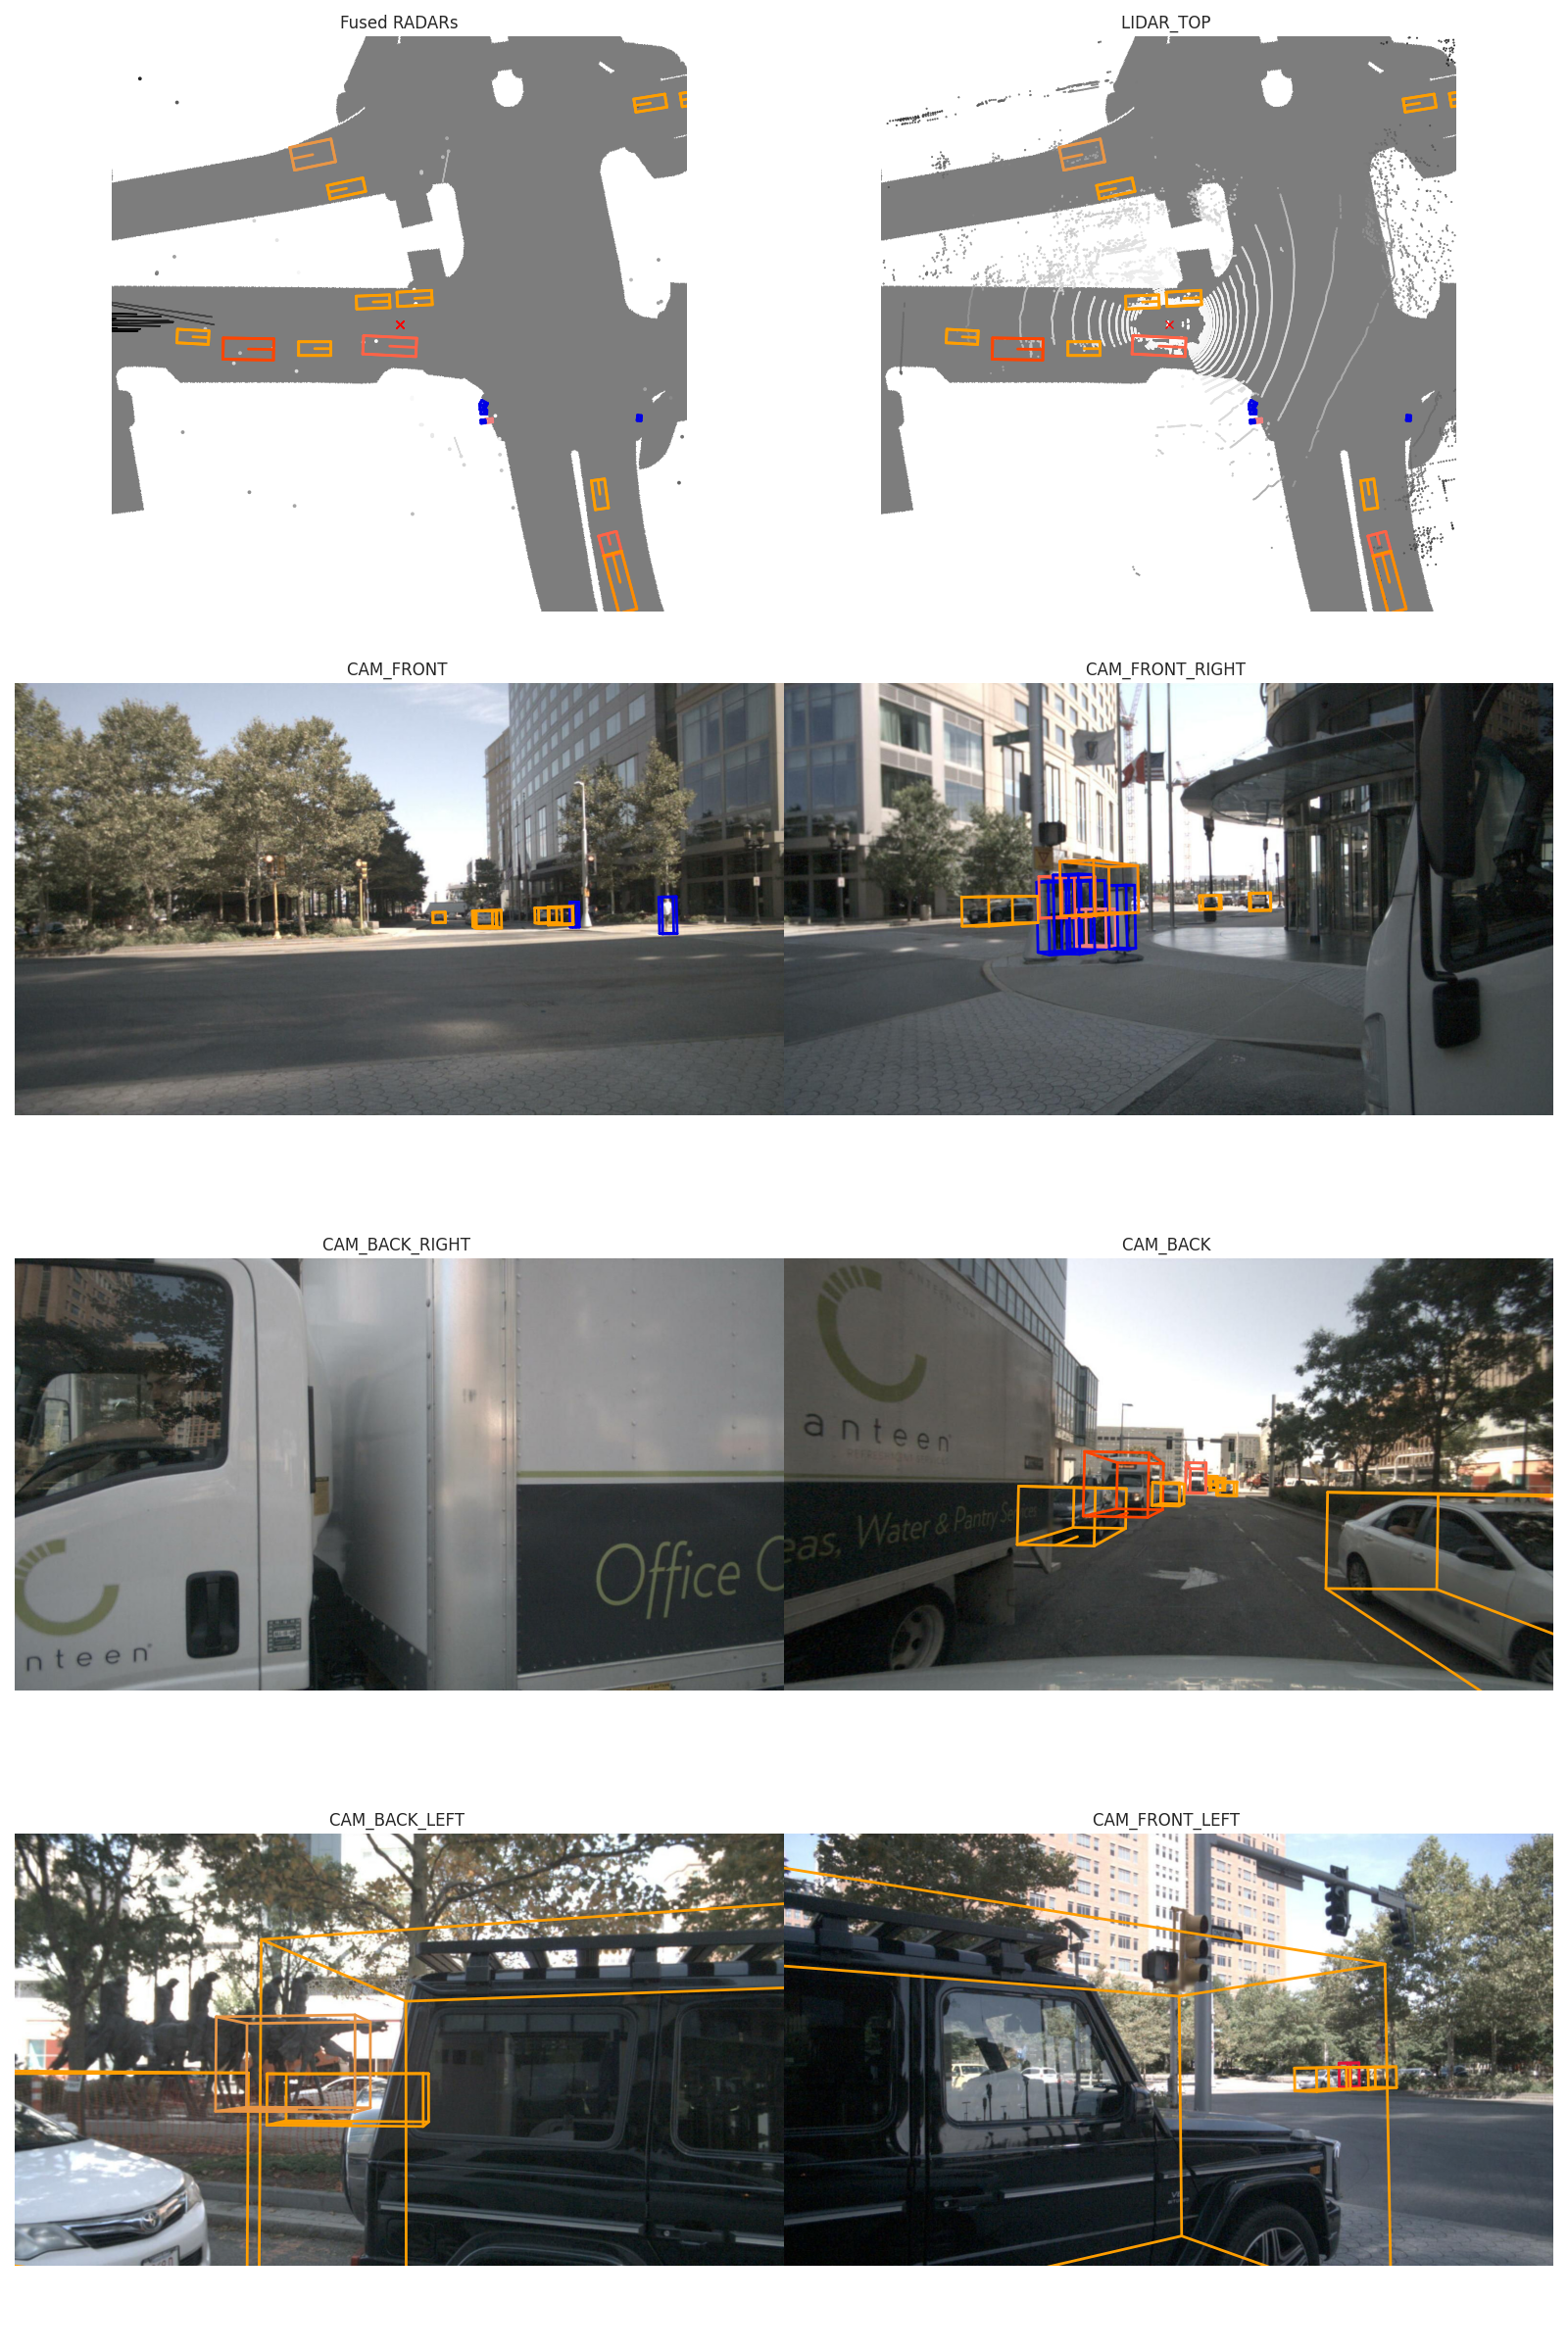

In [11]:
print("Sample:")
Image.open(data_loc[0]+sample_tokens[idx]+'/SENSOR_ANN_VIZ.png')

In [22]:
print("AP and PR summaries:")
from IPython.display import display

# Display top level metrics: mAP, nd_score(nuScenes detection score) mAP_crit and PKL
for l in range(len(data_loc)):
    with open(os.path.join(data_loc[l]+sample_tokens[idx], 'metrics_summary.json'), 'r') as f:
        summary = json.load(f)
        print("Detector: {}".format(detectors[l]))
        print("mAP: {}, nd_Score: {}, mAP_crit: {}".format(summary['mean_ap'], summary['nd_score'], summary['mean_ap_crit']))
    with open(os.path.join(data_root, detectors[l], 'pkl_results.json'), 'r') as f:
        print(json.load(f)['full'][sample_tokens[idx]]) # print sample PKL
        

AP and PR summaries:
Detector: pointpillars-fpn/
mAP: 0.3361005780913189, nd_Score: 0.6380502890456594, mAP_crit: nan
7.392514228820801


In [ ]:
# Read tables into dataframes
dfs_ap = [pd.read_csv(path + sample_tokens[idx] + '/AP_summary.txt', 
                   delimiter=";", names=["Model", "class_name", "dist_th", "AP", "AP_crit"]) for path in data_loc]
for df in dfs_ap:
    for _, i in df.iterrows():
        for c in df.columns.tolist():
            if c == "Model":
                i[c] = i[c].split(' ')[1]
            else: 
                i[c] = i[c].split(' ')[2]
        #i["AP"]=pd.to_numeric(df["AP"])
        #i["AP_crit"]=pd.to_numeric(df["AP_crit"])

for df in dfs_ap:
    display(df)
    
dfs_pr = [pd.read_csv(path + sample_tokens[idx] + '/PR_summary.txt', 
                   delimiter=";", names=[]) for path in data_loc]
for df in dfs_pr:
    display(df)
#visualize_table([d+sample_tokens[idx]+'/PR_summary.txt' for d in data_loc])
#visualize_table([d+sample_tokens[idx]+'/AP_summary.txt' for d in data_loc])

Crit values:


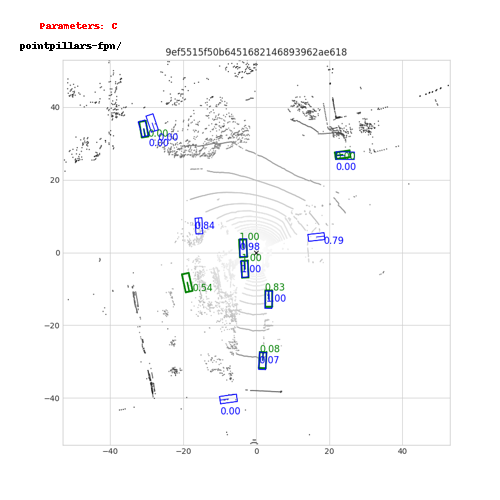

In [23]:
print("Crit values:")
visualize_crits(data_loc, detectors, sample_tokens[idx], 'C')